In [1]:
# %load /Users/facai/Study/book_notes/preconfig.py
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
#sns.set(font='SimHei')
#plt.rcParams['axes.grid'] = False

import numpy as np

import pandas as pd
pd.options.display.max_rows = 20

#import sklearn

#import itertools

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
print(iris['DESCR'])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [4]:
index = pd.MultiIndex.from_product([['x'], iris['feature_names']], names=['variable', 'feature'])

In [5]:
df = pd.DataFrame(data=iris.data, columns=index)
df['y', 'type'] = iris.target
df.head(5)

variable                 x                                     \
feature  sepal length (cm) sepal width (cm) petal length (cm)   
0                      5.1              3.5               1.4   
1                      4.9              3.0               1.4   
2                      4.7              3.2               1.3   
3                      4.6              3.1               1.5   
4                      5.0              3.6               1.4   

variable                     y  
feature  petal width (cm) type  
0                     0.2    0  
1                     0.2    0  
2                     0.2    0  
3                     0.2    0  
4                     0.2    0

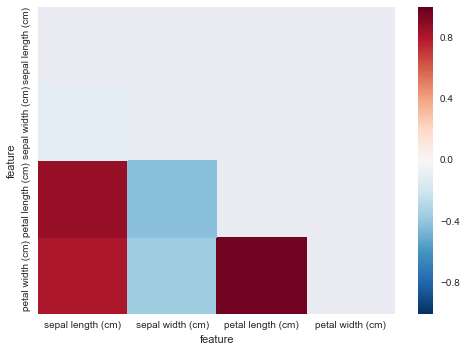

In [6]:
corr = df['x'].corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask)

In [7]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['x'], df['y'], stratify=df['y'])

In [8]:
train = pd.concat([X_train, y_train], axis=1)
train.columns = df.columns
train.head(5)

variable                 x                                     \
feature  sepal length (cm) sepal width (cm) petal length (cm)   
84                     5.4              3.0               4.5   
117                    7.7              3.8               6.7   
127                    6.1              3.0               4.9   
122                    7.7              2.8               6.7   
148                    6.2              3.4               5.4   

variable                     y  
feature  petal width (cm) type  
84                    1.5    1  
117                   2.2    2  
127                   1.8    2  
122                   2.0    2  
148                   2.3    2

In [9]:
test = pd.concat([X_test, y_test], axis=1)
test.columns = df.columns
test.head(5)

variable                 x                                     \
feature  sepal length (cm) sepal width (cm) petal length (cm)   
9                      4.9              3.1               1.5   
37                     4.9              3.1               1.5   
126                    6.2              2.8               4.8   
6                      4.6              3.4               1.4   
137                    6.4              3.1               5.5   

variable                     y  
feature  petal width (cm) type  
9                     0.1    0  
37                    0.1    0  
126                   1.8    2  
6                     0.3    0  
137                   1.8    2

In [10]:
def eval_demo(clf):
    score = clf.fit(train['x'], train['y']).score(test['x'], test['y'])
    print(score)

In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
eval_demo(LinearDiscriminantAnalysis())

0.948717948718


/Users/facai/Library/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
eval_demo(QuadraticDiscriminantAnalysis())

0.923076923077


/Users/facai/Library/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
from sklearn import svm
eval_demo(svm.SVC())

1.0


/Users/facai/Library/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)


In [22]:
eval_demo(svm.LinearSVC())

0.897435897436


/Users/facai/Library/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
from sklearn import linear_model

In [13]:
eval_demo(linear_model.SGDClassifier())

0.666666666667


/Users/facai/Library/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
eval_demo(linear_model.SGDClassifier(average=True))

0.692307692308


/Users/facai/Library/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Nearest Neighbors

In [11]:
from sklearn import neighbors

In [15]:
eval_demo(neighbors.KNeighborsClassifier(algorithm='brute'))

0.974358974359


/Users/facai/Library/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app


In [14]:
eval_demo(neighbors.KNeighborsClassifier(algorithm='ball_tree'))

0.974358974359


/Users/facai/Library/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app


In [13]:
eval_demo(neighbors.RadiusNeighborsClassifier())

0.974358974359


/Users/facai/Library/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app


### Naive Bayes

In [11]:
from sklearn import naive_bayes

In [12]:
eval_demo(naive_bayes.GaussianNB())

0.974358974359


/Users/facai/Library/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Decision Tree

In [13]:
from sklearn import tree

In [15]:
eval_demo(tree.DecisionTreeClassifier())

0.923076923077
